# Sentiment Analysis of the Booking.com Reviews of Hotel Bries in The Hague

In [1]:
# Import packages:
import pandas as pd
import numpy as np

# Get data from the internet:
import requests

# Parse data with BeautifulSoup:
from bs4 import BeautifulSoup

# 100 Most Recent English Reviews

In [2]:
# Import the url for page 1 of the reviews:
# Create a variable to store the URL:
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl&dist=1&pagename=bries-den-haag12&r_lang=en&srpvid=8bf37b30f31100e3&type=total&rows=10&_=1700413667492&offset=0'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information:
page = requests.get(url, headers=headers)

# Make contact with the website:
page

<Response [200]>

In [3]:
# Look at the html code.
# Create a variable to store the HTML info:
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format:
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [4]:
# Find all the review elements in the HTML document:
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data:
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review:
    reviews_data.append({
        'review': reviewer
    })

In [5]:
# Reviews are put into a DataFrame:
all_reviews1 = pd.DataFrame(reviews_data)
all_reviews1

review
0                                                None
1                                                None
2                                                None
3                    [I got a room upgrade for free.]
4                                                None
5                                                None
6                                                None
7                                                None
8   [everything worked well, also the automatic ke...
9                                                None
10                                               None
11                                               None
12                                               None
13                                               None
14  [Clean, cosy, small apartment. Great shower. D...
15                                               None
16                                               None
17                                               None
18                                               None
19                                               None
20                                       [Great room]
21                                               None
22                                               None
23                                               None
24                                               None
25                                               None
26  [The rooms at this hotel are modern and stylis...
27                                               None
28                                               None
29                                               None
30                                               None
31                                               None
32                                               None
33  [Great appartment in the heart of Scheveningen...
34                                               None
35                                               None
36                                               None
37                                               None
38                                               None
39  [Wonderful place. Excellent location, nice and...
40                                               None
41                                               None
42                                               None
43                                               None
44                                               None
45             [Very close to where we needed to be.]
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51  [very nice stay all good, clean room.\rno comp...
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57  [Very practical and clean. Best thing for me w...
58                                               None
59                                               None

In [6]:
# Extract country:
country_data = []
 # Loop over the review elements and extract the desired data:
for country in bries_reviews:
    # Extract the reviewer country:
    country_element = country.find('span', {'bui-avatar-block__subtitle'})
    countryinfo = country_element#.text.strip()

    # Append reviews_data with info about review:
    country_data.append({
        'country': countryinfo
    })

In [7]:
# Review countries that guests come from are put into a DataFrame:
all_countries1 = pd.DataFrame(country_data)
all_countries1

country
0      [[\n, [], \n], Netherlands]
1                             None
2                             None
3                             None
4                             None
5          [[\n, [], \n], Germany]
6                             None
7                             None
8                             None
9                             None
10                            None
11         [[\n, [], \n], Germany]
12                            None
13                            None
14                            None
15                            None
16                            None
17          [[\n, [], \n], Canada]
18                            None
19                            None
20                            None
21                            None
22                            None
23           [[\n, [], \n], Japan]
24                            None
25                            None
26                            None
27                            None
28                            None
29                            None
30         [[\n, [], \n], Germany]
31                            None
32                            None
33                            None
34                            None
35                            None
36        [[\n, [], \n], Bulgaria]
37                            None
38                            None
39                            None
40                            None
41                            None
42  [[\n, [], \n], United Kingdom]
43                            None
44                            None
45                            None
46                            None
47                            None
48     [[\n, [], \n], Netherlands]
49                            None
50                            None
51                            None
52                            None
53                            None
54          [[\n, [], \n], Sweden]
55                            None
56                            None
57                            None
58                            None
59                            None

In [8]:
# The 'None' values are dropped and the index reset:
all_reviews1 = all_reviews1.replace(to_replace='None', value=np.nan).dropna()

all_reviews1.reset_index()

index                                             review
0      3                   [I got a room upgrade for free.]
1      8  [everything worked well, also the automatic ke...
2     14  [Clean, cosy, small apartment. Great shower. D...
3     20                                       [Great room]
4     26  [The rooms at this hotel are modern and stylis...
5     33  [Great appartment in the heart of Scheveningen...
6     39  [Wonderful place. Excellent location, nice and...
7     45             [Very close to where we needed to be.]
8     51  [very nice stay all good, clean room.\rno comp...
9     57  [Very practical and clean. Best thing for me w...

In [9]:
all_countries1 = all_countries1.replace(to_replace='None', value=np.nan).dropna()

all_countries1.reset_index()

index                         country
0      0     [[\n, [], \n], Netherlands]
1      5         [[\n, [], \n], Germany]
2     11         [[\n, [], \n], Germany]
3     17          [[\n, [], \n], Canada]
4     23           [[\n, [], \n], Japan]
5     30         [[\n, [], \n], Germany]
6     36        [[\n, [], \n], Bulgaria]
7     42  [[\n, [], \n], United Kingdom]
8     48     [[\n, [], \n], Netherlands]
9     54          [[\n, [], \n], Sweden]

In [10]:
# Import the url for page 2 of the reviews:
# Create a variable to store the URL:
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=en;srpvid=8bf37b30f31100e3;type=total&&offset=10;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [11]:
# Look at the html code:
# Create a variable to store the HTML info:
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format:
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [12]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [13]:
# Reviews are put into a DataFrame:
all_reviews2 = pd.DataFrame(reviews_data)
all_reviews2

review
0                                                None
1                                                None
2                                                None
3   [The room was lovely and clean, the bathroom w...
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9   [Clean an comfortable. Great location for beac...
10                                               None
11                                               None
12                                               None
13                                               None
14                                               None
15  [Warm welcome by very friendly staff, lovely a...
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21  [The room was ready much earlier than the chec...
22                                               None
23                                               None
24                                               None
25                                               None
26                                               None
27  [Great location, very comfortable room. When t...
28                                               None
29                                               None
30                                               None
31                                               None
32                                               None
33  [The management thought of every detail that t...
34                                               None
35                                               None
36                                               None
37                                               None
38                                               None
39  [It is a very welcoming place, the staff left ...
40                                               None
41                                               None
42                                               None
43                                               None
44                                               None
45  [Perfect stay! I’ve stayed alone and had a sma...
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51                                      [No elevator]
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57  [Beautiful design, spacious rooms and really f...
58                                               None
59                                               None

In [14]:
# The 'None' values are dropped and the index reset:
all_reviews2 = all_reviews2.replace(to_replace='None', value=np.nan).dropna()

all_reviews2.reset_index()

index                                             review
0      3  [The room was lovely and clean, the bathroom w...
1      9  [Clean an comfortable. Great location for beac...
2     15  [Warm welcome by very friendly staff, lovely a...
3     21  [The room was ready much earlier than the chec...
4     27  [Great location, very comfortable room. When t...
5     33  [The management thought of every detail that t...
6     39  [It is a very welcoming place, the staff left ...
7     45  [Perfect stay! I’ve stayed alone and had a sma...
8     51                                      [No elevator]
9     57  [Beautiful design, spacious rooms and really f...

In [15]:
# Extract country:
country_data = []
 # Loop over the review elements and extract the desired data
for country in bries_reviews:
    # Extract the reviewer country
    country_element = country.find('span', {'bui-avatar-block__subtitle'})
    countryinfo = country_element#.text.strip()

    # Append reviews_data with info about review
    country_data.append({
        'country': countryinfo
    })

In [16]:
# Review countries that guests come from are put into a DataFrame:
all_countries2 = pd.DataFrame(country_data)
all_countries2

country
0   [[\n, [], \n], United Kingdom]
1                             None
2                             None
3                             None
4                             None
5                             None
6      [[\n, [], \n], Netherlands]
7                             None
8                             None
9                             None
10                            None
11                            None
12           [[\n, [], \n], Spain]
13                            None
14                            None
15                            None
16                            None
17                            None
18     [[\n, [], \n], Netherlands]
19                            None
20                            None
21                            None
22                            None
23                            None
24          [[\n, [], \n], Poland]
25                            None
26                            None
27                            None
28                            None
29                            None
30   [[\n, [], \n], United States]
31                            None
32                            None
33                            None
34                            None
35                            None
36     [[\n, [], \n], Netherlands]
37                            None
38                            None
39                            None
40                            None
41                            None
42         [[\n, [], \n], Germany]
43                            None
44                            None
45                            None
46                            None
47                            None
48          [[\n, [], \n], Israel]
49                            None
50                            None
51                            None
52                            None
53                            None
54  [[\n, [], \n], Czech Republic]
55                            None
56                            None
57                            None
58                            None
59                            None

In [17]:
all_countries2 = all_countries2.replace(to_replace='None', value=np.nan).dropna()

all_countries2.reset_index()

index                         country
0      0  [[\n, [], \n], United Kingdom]
1      6     [[\n, [], \n], Netherlands]
2     12           [[\n, [], \n], Spain]
3     18     [[\n, [], \n], Netherlands]
4     24          [[\n, [], \n], Poland]
5     30   [[\n, [], \n], United States]
6     36     [[\n, [], \n], Netherlands]
7     42         [[\n, [], \n], Germany]
8     48          [[\n, [], \n], Israel]
9     54  [[\n, [], \n], Czech Republic]

In [18]:
# Import the url for page 3 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=en;srpvid=8bf37b30f31100e3;type=total&&offset=20;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [19]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [20]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [21]:
# Reviews are put into a DataFrame:
all_reviews3 = pd.DataFrame(reviews_data)
all_reviews3

review
0                                                None
1                                                None
2                                                None
3   [Location is the best. Very comfortable, cosy ...
4                                                None
5                                                None
6                                                None
7                                                None
8   [Great neighbourhood location close to world f...
9                                                None
10                                               None
11                                               None
12                                               None
13                                               None
14  [Perfect hotel for walking to the harbour and ...
15                                               None
16                                               None
17                                               None
18                                               None
19                                               None
20  [Good location for my interrest. It's the seco...
21                                               None
22                                               None
23                                               None
24                                               None
25                                       [Everything]
26                                               None
27                                               None
28                                               None
29                                               None
30                                               None
31  [Loved the room and the location, and we had a...
32                                               None
33                                               None
34                                               None
35                                               None
36                                   [great location]
37                                               None
38                                               None
39                                               None
40                                               None
41                                               None
42  [I am a programmer/digital normal. I travel so...
43                                               None
44                                               None
45                                               None
46                                               None
47  [very comfortable nice and big rooms.\ncheck i...
48                                               None
49                                               None
50                                               None
51                                               None
52   [Location, Comfort and Convenience of the Rooms]
53                                               None
54                                               None

In [22]:
# The 'None' values are dropped and the index reset:
all_reviews3 = all_reviews3.replace(to_replace='None', value=np.nan).dropna()

all_reviews3.reset_index()

index                                             review
0      3  [Location is the best. Very comfortable, cosy ...
1      8  [Great neighbourhood location close to world f...
2     14  [Perfect hotel for walking to the harbour and ...
3     20  [Good location for my interrest. It's the seco...
4     25                                       [Everything]
5     31  [Loved the room and the location, and we had a...
6     36                                   [great location]
7     42  [I am a programmer/digital normal. I travel so...
8     47  [very comfortable nice and big rooms.\ncheck i...
9     52   [Location, Comfort and Convenience of the Rooms]

In [23]:
# Extract country:
country_data = []
 # Loop over the review elements and extract the desired data
for country in bries_reviews:
    # Extract the reviewer country
    country_element = country.find('span', {'bui-avatar-block__subtitle'})
    countryinfo = country_element#.text.strip()

    # Append reviews_data with info about review
    country_data.append({
        'country': countryinfo
    })

In [24]:
# Review countries that guests come from are put into a DataFrame:
all_countries3 = pd.DataFrame(country_data)
all_countries3

country
0   [[\n, [], \n], Netherlands]
1                          None
2                          None
3                          None
4                          None
5     [[\n, [], \n], Australia]
6                          None
7                          None
8                          None
9                          None
10                         None
11  [[\n, [], \n], New Zealand]
12                         None
13                         None
14                         None
15                         None
16                         None
17      [[\n, [], \n], Romania]
18                         None
19                         None
20                         None
21                         None
22      [[\n, [], \n], Germany]
23                         None
24                         None
25                         None
26                         None
27                         None
28      [[\n, [], \n], Belgium]
29                         None
30                         None
31                         None
32                         None
33    [[\n, [], \n], Australia]
34                         None
35                         None
36                         None
37                         None
38                         None
39      [[\n, [], \n], Romania]
40                         None
41                         None
42                         None
43                         None
44      [[\n, [], \n], Germany]
45                         None
46                         None
47                         None
48                         None
49       [[\n, [], \n], Brazil]
50                         None
51                         None
52                         None
53                         None
54                         None

In [25]:
all_countries3 = all_countries3.replace(to_replace='None', value=np.nan).dropna()

all_countries3.reset_index()

index                      country
0      0  [[\n, [], \n], Netherlands]
1      5    [[\n, [], \n], Australia]
2     11  [[\n, [], \n], New Zealand]
3     17      [[\n, [], \n], Romania]
4     22      [[\n, [], \n], Germany]
5     28      [[\n, [], \n], Belgium]
6     33    [[\n, [], \n], Australia]
7     39      [[\n, [], \n], Romania]
8     44      [[\n, [], \n], Germany]
9     49       [[\n, [], \n], Brazil]

In [26]:
# Import the url for page 4 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=en;srpvid=8bf37b30f31100e3;type=total&&offset=30;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [27]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [28]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [29]:
# Reviews are put into a DataFrame:
all_reviews4 = pd.DataFrame(reviews_data)
all_reviews4

review
0                                                None
1                                                None
2                                                None
3   [The location is very good to spend business t...
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9                             [clean and comfortable]
10                                               None
11                                               None
12                                               None
13                                               None
14                                               None
15  [Miriam was great! Super warm welcome and good...
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21  [lovely styling, kitchenette and allowed early...
22                                               None
23                                               None
24                                               None
25                                               None
26                        [quiet, clean, confortable]
27                                               None
28                                               None
29                                               None
30                                               None
31                                               None
32                           [breakfast in the room…]
33                                               None
34                                               None
35                                               None
36                                               None
37                                               None
38  [If you don't want to walk several hundred met...
39                                               None
40                                               None
41                                               None
42                                               None
43                                  [Very efficient.]
44                                               None
45                                               None
46                                               None
47                                               None
48  [Location is amazing! Close to shopping street...
49                                               None
50                                               None
51                                               None
52                                               None
53  [The room is beautiful, large, clean and comfo...
54                                               None

In [30]:
# The 'None' values are dropped and the index reset:
all_reviews4 = all_reviews4.replace(to_replace='None', value=np.nan).dropna()

all_reviews4.reset_index()

index                                             review
0      3  [The location is very good to spend business t...
1      9                            [clean and comfortable]
2     15  [Miriam was great! Super warm welcome and good...
3     21  [lovely styling, kitchenette and allowed early...
4     26                        [quiet, clean, confortable]
5     32                           [breakfast in the room…]
6     38  [If you don't want to walk several hundred met...
7     43                                  [Very efficient.]
8     48  [Location is amazing! Close to shopping street...
9     53  [The room is beautiful, large, clean and comfo...

In [31]:
# Extract country:
country_data = []
 # Loop over the review elements and extract the desired data
for country in bries_reviews:
    # Extract the reviewer country
    country_element = country.find('span', {'bui-avatar-block__subtitle'})
    countryinfo = country_element#.text.strip()

    # Append reviews_data with info about review
    country_data.append({
        'country': countryinfo
    })

In [32]:
# Review countries that guests come from are put into a DataFrame:
all_countries4 = pd.DataFrame(country_data)
all_countries4

country
0          [[\n, [], \n], Ukraine]
1                             None
2                             None
3                             None
4                             None
5                             None
6    [[\n, [], \n], United States]
7                             None
8                             None
9                             None
10                            None
11                            None
12         [[\n, [], \n], Romania]
13                            None
14                            None
15                            None
16                            None
17                            None
18  [[\n, [], \n], United Kingdom]
19                            None
20                            None
21                            None
22                            None
23         [[\n, [], \n], Belgium]
24                            None
25                            None
26                            None
27                            None
28                            None
29     [[\n, [], \n], Switzerland]
30                            None
31                            None
32                            None
33                            None
34                            None
35  [[\n, [], \n], Czech Republic]
36                            None
37                            None
38                            None
39                            None
40     [[\n, [], \n], Netherlands]
41                            None
42                            None
43                            None
44                            None
45          [[\n, [], \n], Poland]
46                            None
47                            None
48                            None
49                            None
50        [[\n, [], \n], Thailand]
51                            None
52                            None
53                            None
54                            None

In [33]:
all_countries4 = all_countries4.replace(to_replace='None', value=np.nan).dropna()

all_countries4.reset_index()

index                         country
0      0         [[\n, [], \n], Ukraine]
1      6   [[\n, [], \n], United States]
2     12         [[\n, [], \n], Romania]
3     18  [[\n, [], \n], United Kingdom]
4     23         [[\n, [], \n], Belgium]
5     29     [[\n, [], \n], Switzerland]
6     35  [[\n, [], \n], Czech Republic]
7     40     [[\n, [], \n], Netherlands]
8     45          [[\n, [], \n], Poland]
9     50        [[\n, [], \n], Thailand]

In [34]:
# Import the url for page 5 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=en;srpvid=8bf37b30f31100e3;type=total&&offset=40;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [35]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [36]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [37]:
# Reviews are put into a DataFrame:
all_reviews5 = pd.DataFrame(reviews_data)
all_reviews5

review
0                                                None
1                                                None
2                                                None
3   [Spacious and clean room with all the equipmen...
4                                                None
5                                                None
6                                                None
7                                                None
8   [Hotel Bries is in a very nice area situated. ...
9                                                None
10                                               None
11                                               None
12                                               None
13                                               None
14  [fully furnished, kitchen with essentials, con...
15                                               None
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21  [The place is just great! We had 2 bedrooms: s...
22                                               None
23                                               None
24                                               None
25                                               None
26                                               None
27  [The friendliness and concern of the staff. Th...
28                                               None
29                                               None
30                                               None
31                                               None
32                                               None
33           [Tv need to be placed a bit different:)]
34                                               None
35                                               None
36                                               None
37                                               None
38                                               None
39  [Location, facilities and the room was so cozy...
40                                               None
41                                               None
42                                               None
43                                               None
44                                               None
45  [Everything is modern and clean . Small kitche...
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51  [The hotel was beautiful, in a quiet area. The...
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57  [Everything was excellent here! The Reception ...
58                                               None
59                                               None

In [38]:
# The 'None' values are dropped and the index reset:
all_reviews5 = all_reviews5.replace(to_replace='None', value=np.nan).dropna()

all_reviews5.reset_index()

index                                             review
0      3  [Spacious and clean room with all the equipmen...
1      8  [Hotel Bries is in a very nice area situated. ...
2     14  [fully furnished, kitchen with essentials, con...
3     21  [The place is just great! We had 2 bedrooms: s...
4     27  [The friendliness and concern of the staff. Th...
5     33           [Tv need to be placed a bit different:)]
6     39  [Location, facilities and the room was so cozy...
7     45  [Everything is modern and clean . Small kitche...
8     51  [The hotel was beautiful, in a quiet area. The...
9     57  [Everything was excellent here! The Reception ...

In [39]:
# Extract country:
country_data = []
 # Loop over the review elements and extract the desired data
for country in bries_reviews:
    # Extract the reviewer country
    country_element = country.find('span', {'bui-avatar-block__subtitle'})
    countryinfo = country_element#.text.strip()

    # Append reviews_data with info about review
    country_data.append({
        'country': countryinfo
    })

In [40]:
# Review countries that guests come from are put into a DataFrame:
all_countries5 = pd.DataFrame(country_data)
all_countries5

country
0    [[\n, [], \n], United States]
1                             None
2                             None
3                             None
4                             None
5          [[\n, [], \n], Germany]
6                             None
7                             None
8                             None
9                             None
10                            None
11     [[\n, [], \n], Netherlands]
12                            None
13                            None
14                            None
15                            None
16                            None
17                            None
18      [[\n, [], \n], Luxembourg]
19                            None
20                            None
21                            None
22                            None
23                            None
24          [[\n, [], \n], Brazil]
25                            None
26                            None
27                            None
28                            None
29                            None
30     [[\n, [], \n], Netherlands]
31                            None
32                            None
33                            None
34                            None
35                            None
36         [[\n, [], \n], Ireland]
37                            None
38                            None
39                            None
40                            None
41                            None
42           [[\n, [], \n], Libya]
43                            None
44                            None
45                            None
46                            None
47                            None
48  [[\n, [], \n], United Kingdom]
49                            None
50                            None
51                            None
52                            None
53                            None
54         [[\n, [], \n], Romania]
55                            None
56                            None
57                            None
58                            None
59                            None

In [41]:
all_countries5 = all_countries5.replace(to_replace='None', value=np.nan).dropna()

all_countries5.reset_index()

index                         country
0      0   [[\n, [], \n], United States]
1      5         [[\n, [], \n], Germany]
2     11     [[\n, [], \n], Netherlands]
3     18      [[\n, [], \n], Luxembourg]
4     24          [[\n, [], \n], Brazil]
5     30     [[\n, [], \n], Netherlands]
6     36         [[\n, [], \n], Ireland]
7     42           [[\n, [], \n], Libya]
8     48  [[\n, [], \n], United Kingdom]
9     54         [[\n, [], \n], Romania]

In [42]:
# Import the url for page 6 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=en;srpvid=8bf37b30f31100e3;type=total&&offset=50;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [43]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [44]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [45]:
# Reviews are put into a DataFrame:
all_reviews6 = pd.DataFrame(reviews_data)
all_reviews6

review
0                                                None
1                                                None
2                                                None
3   [Amazing place with amazing staff.  It's our s...
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9   [Very family friendly hotel ! Recommend for su...
10                                               None
11                                               None
12                                               None
13                                               None
14                                               None
15                                       [very clean]
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21  [A hotel where everything is thought of . Conv...
22                                               None
23                                               None
24                                               None
25                                               None
26                                               None
27  [loved the fact it was a nice guest house with...
28                                               None
29                                               None
30                                               None
31                                               None
32                                               None
33  [Very nice hotel, clean and location is perfec...
34                                               None
35                                               None
36                                               None
37                                               None
38                                               None
39  [Super nice building and stylish, comfortable,...
40                                               None
41                                               None
42                                               None
43                                               None
44                                               None
45  [This was a lovely place to stay! Clean, quiet...
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51  [Nice apartment, nice manager, perfect locatio...
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57                                   [Staff helpful.]
58                                               None
59                                               None

In [46]:
# The 'None' values are dropped and the index reset:
all_reviews6 = all_reviews6.replace(to_replace='None', value=np.nan).dropna()

all_reviews6.reset_index()

index                                             review
0      3  [Amazing place with amazing staff.  It's our s...
1      9  [Very family friendly hotel ! Recommend for su...
2     15                                       [very clean]
3     21  [A hotel where everything is thought of . Conv...
4     27  [loved the fact it was a nice guest house with...
5     33  [Very nice hotel, clean and location is perfec...
6     39  [Super nice building and stylish, comfortable,...
7     45  [This was a lovely place to stay! Clean, quiet...
8     51  [Nice apartment, nice manager, perfect locatio...
9     57                                   [Staff helpful.]

In [47]:
# Extract country:
country_data = []
 # Loop over the review elements and extract the desired data
for country in bries_reviews:
    # Extract the reviewer country
    country_element = country.find('span', {'bui-avatar-block__subtitle'})
    countryinfo = country_element#.text.strip()

    # Append reviews_data with info about review
    country_data.append({
        'country': countryinfo
    })

In [48]:
# Review countries that guests come from are put into a DataFrame:
all_countries6 = pd.DataFrame(country_data)
all_countries6

country
0           [[\n, [], \n], Russia]
1                             None
2                             None
3                             None
4                             None
5                             None
6     [[\n, [], \n], Saudi Arabia]
7                             None
8                             None
9                             None
10                            None
11                            None
12      [[\n, [], \n], Luxembourg]
13                            None
14                            None
15                            None
16                            None
17                            None
18         [[\n, [], \n], Estonia]
19                            None
20                            None
21                            None
22                            None
23                            None
24  [[\n, [], \n], United Kingdom]
25                            None
26                            None
27                            None
28                            None
29                            None
30         [[\n, [], \n], Ukraine]
31                            None
32                            None
33                            None
34                            None
35                            None
36      [[\n, [], \n], Luxembourg]
37                            None
38                            None
39                            None
40                            None
41                            None
42         [[\n, [], \n], Belgium]
43                            None
44                            None
45                            None
46                            None
47                            None
48         [[\n, [], \n], Germany]
49                            None
50                            None
51                            None
52                            None
53                            None
54     [[\n, [], \n], Netherlands]
55                            None
56                            None
57                            None
58                            None
59                            None

In [49]:
all_countries6 = all_countries6.replace(to_replace='None', value=np.nan).dropna()

all_countries6.reset_index()

index                         country
0      0          [[\n, [], \n], Russia]
1      6    [[\n, [], \n], Saudi Arabia]
2     12      [[\n, [], \n], Luxembourg]
3     18         [[\n, [], \n], Estonia]
4     24  [[\n, [], \n], United Kingdom]
5     30         [[\n, [], \n], Ukraine]
6     36      [[\n, [], \n], Luxembourg]
7     42         [[\n, [], \n], Belgium]
8     48         [[\n, [], \n], Germany]
9     54     [[\n, [], \n], Netherlands]

In [50]:
# Import the url for page 7 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=en;srpvid=8bf37b30f31100e3;type=total&&offset=60;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [51]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [52]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [53]:
# Reviews are put into a DataFrame:
all_reviews7 = pd.DataFrame(reviews_data)
all_reviews7

review
0                                                None
1                                                None
2                                                None
3                                    [size and style]
4                                                None
..                                                ...
56                                               None
57                                               None
58  [cleanliness, functionality was great, perfect...
59                                               None
60                                               None

[61 rows x 1 columns]

In [54]:
# The 'None' values are dropped and the index reset:
all_reviews7 = all_reviews7.replace(to_replace='None', value=np.nan).dropna()

all_reviews7.reset_index()

index                                             review
0      3                                   [size and style]
1      9  [Very cozy apartments. The best option for fam...
2     15                                      [de up great]
3     21  [Excellent stay with comfortable beds and spac...
4     27  [Everything was really perfect, highly recomme...
5     33  [Hotel Bries is in a perfect location. Parking...
6     39  [The hotel was brilliant and the staff were so...
7     45  [Great room, great shower. Very clean, good cl...
8     52  [it was quiet, big (double room), had a wonder...
9     58  [cleanliness, functionality was great, perfect...

In [55]:
# Extract country:
country_data = []
 # Loop over the review elements and extract the desired data
for country in bries_reviews:
    # Extract the reviewer country
    country_element = country.find('span', {'bui-avatar-block__subtitle'})
    countryinfo = country_element#.text.strip()

    # Append reviews_data with info about review
    country_data.append({
        'country': countryinfo
    })

In [56]:
# Review countries that guests come from are put into a DataFrame:
all_countries7 = pd.DataFrame(country_data)
all_countries7

country
0   [[\n, [], \n], France]
1                     None
2                     None
3                     None
4                     None
..                     ...
56                    None
57                    None
58                    None
59                    None
60                    None

[61 rows x 1 columns]

In [57]:
all_countries7 = all_countries7.replace(to_replace='None', value=np.nan).dropna()

all_countries7.reset_index()

index                         country
0      0          [[\n, [], \n], France]
1      6         [[\n, [], \n], Ukraine]
2     12         [[\n, [], \n], Belgium]
3     18         [[\n, [], \n], Germany]
4     24         [[\n, [], \n], Ukraine]
5     30  [[\n, [], \n], United Kingdom]
6     36  [[\n, [], \n], United Kingdom]
7     42     [[\n, [], \n], Netherlands]
8     49     [[\n, [], \n], Switzerland]
9     55    [[\n, [], \n], South Africa]

In [58]:
# Import the url for page 8 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=en;srpvid=8bf37b30f31100e3;type=total&&offset=70;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [59]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [60]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [61]:
# Reviews are put into a DataFrame:
all_reviews8 = pd.DataFrame(reviews_data)
all_reviews8

review
0                                                None
1                                                None
2                                                None
3   [a hotel with no staff, you check in with a co...
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9   [Excellent room and bathroom. Clean, surprisin...
10                                               None
11                                               None
12                                               None
13                                               None
14                                               None
15  [perfect location\rmodern, new and clean room\...
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21  [Very nice, quiet location.  Very walkable. Se...
22                                               None
23                                               None
24                                               None
25                                               None
26                                               None
27  [Great communication and lovely friendly welco...
28                                               None
29                                               None
30                                               None
31                                               None
32                                               None
33  [Seamless check in, close to the beach, comfor...
34                                               None
35                                               None
36                                               None
37                                               None
38                                               None
39  [The room is spacious, clean, and modern with ...
40                                               None
41                                               None
42                                               None
43                                               None
44                                               None
45  [This hotel is located very near good friends ...
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51  [Aircon was such a great addition in the heat ...
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57                   [location, bed, bathroom, price]
58                                               None
59                                               None

In [62]:
# The 'None' values are dropped and the index reset:
all_reviews8 = all_reviews8.replace(to_replace='None', value=np.nan).dropna()

all_reviews8.reset_index()

index                                             review
0      3  [a hotel with no staff, you check in with a co...
1      9  [Excellent room and bathroom. Clean, surprisin...
2     15  [perfect location\rmodern, new and clean room\...
3     21  [Very nice, quiet location.  Very walkable. Se...
4     27  [Great communication and lovely friendly welco...
5     33  [Seamless check in, close to the beach, comfor...
6     39  [The room is spacious, clean, and modern with ...
7     45  [This hotel is located very near good friends ...
8     51  [Aircon was such a great addition in the heat ...
9     57                   [location, bed, bathroom, price]

In [63]:
# Extract country:
country_data = []
 # Loop over the review elements and extract the desired data
for country in bries_reviews:
    # Extract the reviewer country
    country_element = country.find('span', {'bui-avatar-block__subtitle'})
    countryinfo = country_element#.text.strip()

    # Append reviews_data with info about review
    country_data.append({
        'country': countryinfo
    })

In [64]:
# Review countries that guests come from are put into a DataFrame:
all_countries8 = pd.DataFrame(country_data)
all_countries8

country
0      [[\n, [], \n], Netherlands]
1                             None
2                             None
3                             None
4                             None
5                             None
6          [[\n, [], \n], Romania]
7                             None
8                             None
9                             None
10                            None
11                            None
12           [[\n, [], \n], Spain]
13                            None
14                            None
15                            None
16                            None
17                            None
18   [[\n, [], \n], United States]
19                            None
20                            None
21                            None
22                            None
23                            None
24  [[\n, [], \n], United Kingdom]
25                            None
26                            None
27                            None
28                            None
29                            None
30          [[\n, [], \n], Canada]
31                            None
32                            None
33                            None
34                            None
35                            None
36   [[\n, [], \n], United States]
37                            None
38                            None
39                            None
40                            None
41                            None
42   [[\n, [], \n], United States]
43                            None
44                            None
45                            None
46                            None
47                            None
48  [[\n, [], \n], United Kingdom]
49                            None
50                            None
51                            None
52                            None
53                            None
54     [[\n, [], \n], Switzerland]
55                            None
56                            None
57                            None
58                            None
59                            None

In [65]:
all_countries8 = all_countries8.replace(to_replace='None', value=np.nan).dropna()

all_countries8.reset_index()

index                         country
0      0     [[\n, [], \n], Netherlands]
1      6         [[\n, [], \n], Romania]
2     12           [[\n, [], \n], Spain]
3     18   [[\n, [], \n], United States]
4     24  [[\n, [], \n], United Kingdom]
5     30          [[\n, [], \n], Canada]
6     36   [[\n, [], \n], United States]
7     42   [[\n, [], \n], United States]
8     48  [[\n, [], \n], United Kingdom]
9     54     [[\n, [], \n], Switzerland]

In [66]:
# Import the url for page 9 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=en;srpvid=8bf37b30f31100e3;type=total&&offset=80;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [67]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [68]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [69]:
# Reviews are put into a DataFrame:
all_reviews9 = pd.DataFrame(reviews_data)
all_reviews9

review
0                                                None
1                                                None
2                                                None
3   [Easy check in, cleanliness, communication w/ ...
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9   [The room was just like we expected from the p...
10                                               None
11                                               None
12                                               None
13                                               None
14                                               None
15  [The location was perfect and staff incredibly...
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21  [Everything about the hotel is fab from the pr...
22                                               None
23                                               None
24                                               None
25                                               None
26                                               None
27    [good Location to Harbour and public Transport]
28                                               None
29                                               None
30                                               None
31                                               None
32                                               None
33  [Excellent hotel. No reception desk and everyt...
34                                               None
35                                               None
36                                               None
37                                               None
38                                               None
39  [The beach in walking distance.\rTram station ...
40                                               None
41                                               None
42                                               None
43                                               None
44                                               None
45        [The staff was super friendly and helpful.]
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51  [contactless stay. no staff. all via online se...
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57  [Very friendly and helpful staff, nice locatio...
58                                               None
59                                               None

In [70]:
# The 'None' values are dropped and the index reset:
all_reviews9 = all_reviews9.replace(to_replace='None', value=np.nan).dropna()

all_reviews9.reset_index()

index                                             review
0      3  [Easy check in, cleanliness, communication w/ ...
1      9  [The room was just like we expected from the p...
2     15  [The location was perfect and staff incredibly...
3     21  [Everything about the hotel is fab from the pr...
4     27    [good Location to Harbour and public Transport]
5     33  [Excellent hotel. No reception desk and everyt...
6     39  [The beach in walking distance.\rTram station ...
7     45        [The staff was super friendly and helpful.]
8     51  [contactless stay. no staff. all via online se...
9     57  [Very friendly and helpful staff, nice locatio...

In [71]:
# Extract country:
country_data = []
 # Loop over the review elements and extract the desired data
for country in bries_reviews:
    # Extract the reviewer country
    country_element = country.find('span', {'bui-avatar-block__subtitle'})
    countryinfo = country_element#.text.strip()

    # Append reviews_data with info about review
    country_data.append({
        'country': countryinfo
    })

In [72]:
# Review countries that guests come from are put into a DataFrame:
all_countries9 = pd.DataFrame(country_data)
all_countries9

country
0          [[\n, [], \n], Austria]
1                             None
2                             None
3                             None
4                             None
5                             None
6          [[\n, [], \n], Germany]
7                             None
8                             None
9                             None
10                            None
11                            None
12         [[\n, [], \n], Germany]
13                            None
14                            None
15                            None
16                            None
17                            None
18  [[\n, [], \n], United Kingdom]
19                            None
20                            None
21                            None
22                            None
23                            None
24         [[\n, [], \n], Germany]
25                            None
26                            None
27                            None
28                            None
29                            None
30     [[\n, [], \n], Netherlands]
31                            None
32                            None
33                            None
34                            None
35                            None
36  [[\n, [], \n], Czech Republic]
37                            None
38                            None
39                            None
40                            None
41                            None
42  [[\n, [], \n], United Kingdom]
43                            None
44                            None
45                            None
46                            None
47                            None
48           [[\n, [], \n], China]
49                            None
50                            None
51                            None
52                            None
53                            None
54         [[\n, [], \n], Denmark]
55                            None
56                            None
57                            None
58                            None
59                            None

In [73]:
all_countries9 = all_countries9.replace(to_replace='None', value=np.nan).dropna()

all_countries9.reset_index()

index                         country
0      0         [[\n, [], \n], Austria]
1      6         [[\n, [], \n], Germany]
2     12         [[\n, [], \n], Germany]
3     18  [[\n, [], \n], United Kingdom]
4     24         [[\n, [], \n], Germany]
5     30     [[\n, [], \n], Netherlands]
6     36  [[\n, [], \n], Czech Republic]
7     42  [[\n, [], \n], United Kingdom]
8     48           [[\n, [], \n], China]
9     54         [[\n, [], \n], Denmark]

In [74]:
# Import the url for page 10 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=en;srpvid=8bf37b30f31100e3;type=total&&offset=90;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [75]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [76]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [77]:
# Reviews are put into a DataFrame:
all_reviews10 = pd.DataFrame(reviews_data)
all_reviews10

review
0                                                None
1                                                None
2                                                None
3   [bed really comfortable, personalised message ...
4                                                None
..                                                ...
57                                               None
58                                               None
59               [kitchenette, large shower, balcony]
60                                               None
61                                               None

[62 rows x 1 columns]

In [78]:
# The 'None' values are dropped and the index reset:
all_reviews10 = all_reviews10.replace(to_replace='None', value=np.nan).dropna()

all_reviews10.reset_index()

index                                             review
0      3  [bed really comfortable, personalised message ...
1      9                              [Good place and chip]
2     15  [Everything was quite well. Service smooth and...
3     21  [excellent quality, great space and light, sup...
4     27  [Location was excellent, not in the noise of t...
5     33                   [Super friendly, helpful staff.]
6     39  [the design is simple and very confy. a mini k...
7     46  [Very comfortable and modern, quiet, ideally l...
8     52  [Perfect location, close to the Beach and Den ...
9     59               [kitchenette, large shower, balcony]

In [79]:
# Extract country:
country_data = []
 # Loop over the review elements and extract the desired data
for country in bries_reviews:
    # Extract the reviewer country
    country_element = country.find('span', {'bui-avatar-block__subtitle'})
    countryinfo = country_element#.text.strip()

    # Append reviews_data with info about review
    country_data.append({
        'country': countryinfo
    })

In [80]:
# Review countries that guests come from are put into a DataFrame:
all_countries10 = pd.DataFrame(country_data)
all_countries10

country
0   [[\n, [], \n], Belgium]
1                      None
2                      None
3                      None
4                      None
..                      ...
57                     None
58                     None
59                     None
60                     None
61                     None

[62 rows x 1 columns]

In [81]:
all_countries10 = all_countries10.replace(to_replace='None', value=np.nan).dropna()

all_countries10.reset_index()

index                      country
0      0      [[\n, [], \n], Belgium]
1      6       [[\n, [], \n], Poland]
2     12      [[\n, [], \n], Ukraine]
3     18      [[\n, [], \n], Germany]
4     24  [[\n, [], \n], Netherlands]
5     30  [[\n, [], \n], Netherlands]
6     36      [[\n, [], \n], Romania]
7     43  [[\n, [], \n], Netherlands]
8     49  [[\n, [], \n], Netherlands]
9     56  [[\n, [], \n], Netherlands]

In [82]:
# Join all the DataFrames into one DataFrame for analysis:

all_reviews = pd.concat([all_reviews1, all_reviews2, all_reviews3, all_reviews4, all_reviews5
                        , all_reviews6, all_reviews7, all_reviews8, all_reviews9, all_reviews10], axis=0)

all_reviews

review
3                    [I got a room upgrade for free.]
8   [everything worked well, also the automatic ke...
14  [Clean, cosy, small apartment. Great shower. D...
20                                       [Great room]
26  [The rooms at this hotel are modern and stylis...
..                                                ...
33                   [Super friendly, helpful staff.]
39  [the design is simple and very confy. a mini k...
46  [Very comfortable and modern, quiet, ideally l...
52  [Perfect location, close to the Beach and Den ...
59               [kitchenette, large shower, balcony]

[100 rows x 1 columns]

In [83]:
all_countries = pd.concat([all_countries1, all_countries2, all_countries3, all_countries4, all_countries5
                        , all_countries6, all_countries7, all_countries8, all_countries9, all_countries10], axis=0)

all_countries

country
0   [[\n, [], \n], Netherlands]
5       [[\n, [], \n], Germany]
11      [[\n, [], \n], Germany]
17       [[\n, [], \n], Canada]
23        [[\n, [], \n], Japan]
..                          ...
30  [[\n, [], \n], Netherlands]
36      [[\n, [], \n], Romania]
43  [[\n, [], \n], Netherlands]
49  [[\n, [], \n], Netherlands]
56  [[\n, [], \n], Netherlands]

[100 rows x 1 columns]

## Sentiment Analysis of the English Language Reviews

In [84]:
# Import libraries for NLP of the reviews:

import nltk 
import os 
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter:
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

/Users/Claire/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [85]:
# Determine if there are any missing values:
all_reviews['review'].isna().sum()

0

In [86]:
# The reviews are changed from lists to strings:

all_reviews = pd.DataFrame(all_reviews['review'].apply(lambda x: ''.join(map(str, x))))

all_reviews

review
3                      I got a room upgrade for free.
8   everything worked well, also the automatic key...
14  Clean, cosy, small apartment. Great shower. Do...
20                                         Great room
26  The rooms at this hotel are modern and stylish...
..                                                ...
33                     Super friendly, helpful staff.
39  the design is simple and very confy. a mini ki...
46  Very comfortable and modern, quiet, ideally lo...
52  Perfect location, close to the Beach and Den H...
59                 kitchenette, large shower, balcony

[100 rows x 1 columns]

In [87]:
# Change all to lower case and join with a space:

all_reviews['review'] = all_reviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

all_reviews['review'].head()

3                        i got a room upgrade for free.
8     everything worked well, also the automatic key...
14    clean, cosy, small apartment. great shower. do...
20                                           great room
26    the rooms at this hotel are modern and stylish...
Name: review, dtype: object

In [88]:
# Replace all the punctuation in review column:
all_reviews['review'] = all_reviews['review'].str.replace('[^\w\s]','')

# View output:
all_reviews['review'].head()

3                         i got a room upgrade for free
8     everything worked well also the automatic key ...
14    clean cosy small apartment great shower door u...
20                                           great room
26    the rooms at this hotel are modern and stylish...
Name: review, dtype: object

In [89]:
# Check for duplicates in the review column:
all_reviews.review.duplicated().sum()

0

In [90]:
# Apply tokenisation to the reviews:
all_reviews['tokens'] = all_reviews['review'].apply(word_tokenize)

# View DataFrame:
all_reviews.reset_index()
all_reviews.head()

review  \
3                       i got a room upgrade for free   
8   everything worked well also the automatic key ...   
14  clean cosy small apartment great shower door u...   
20                                         great room   
26  the rooms at this hotel are modern and stylish...   

                                               tokens  
3               [i, got, a, room, upgrade, for, free]  
8   [everything, worked, well, also, the, automati...  
14  [clean, cosy, small, apartment, great, shower,...  
20                                      [great, room]  
26  [the, rooms, at, this, hotel, are, modern, and...

In [91]:
# Convert the tokens column from lists to a string in a new DataFrame in order to create Word Cloud:
review_words = pd.DataFrame(all_reviews['tokens'].apply(lambda x: ','.join(map(str, x))))

review_words

tokens
3                       i,got,a,room,upgrade,for,free
8   everything,worked,well,also,the,automatic,key,...
14  clean,cosy,small,apartment,great,shower,door,u...
20                                         great,room
26  the,rooms,at,this,hotel,are,modern,and,stylish...
..                                                ...
33                       super,friendly,helpful,staff
39  the,design,is,simple,and,very,confy,a,mini,kit...
46  very,comfortable,and,modern,quiet,ideally,located
52  perfect,location,close,to,the,beach,and,den,ha...
59                   kitchenette,large,shower,balcony

[100 rows x 1 columns]

In [92]:
review_words = review_words.reset_index()

In [93]:
# Create a word cloud:
all_tokens = ''

for i in range(review_words.shape[0]):
    # Add each token to the list:
    all_tokens = all_tokens + review_words['tokens'][i]

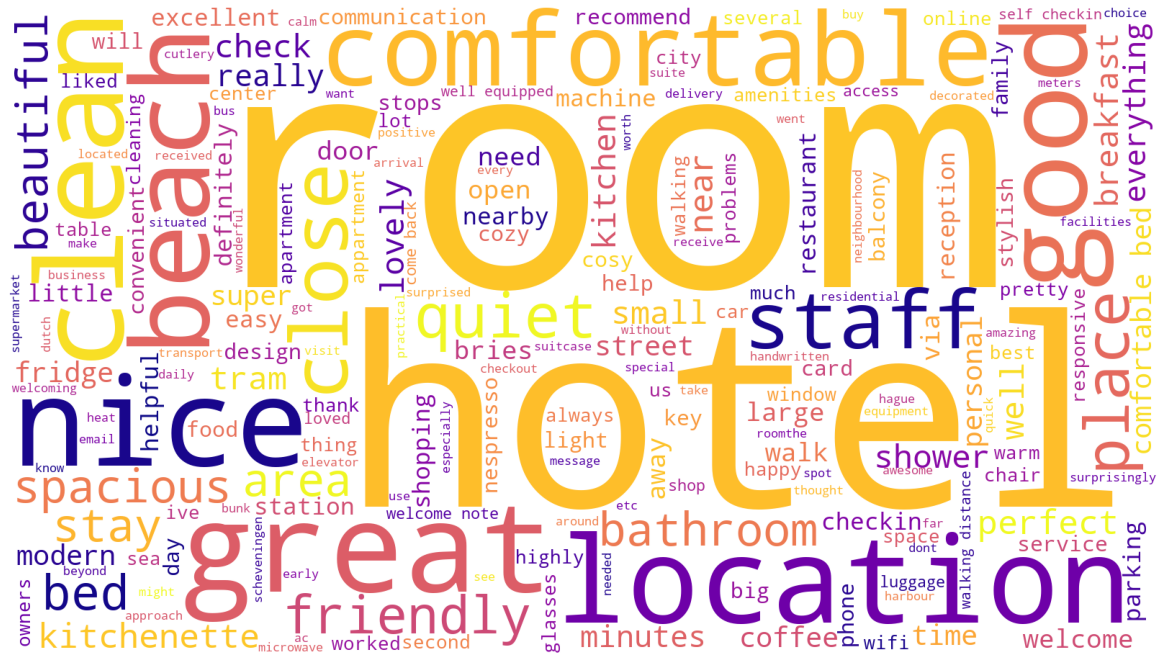

In [94]:
# Plot the WordCloud image:
import matplotlib.pyplot as plt 
import seaborn as sns

# Create a WordCloud:
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='plasma', 
                min_font_size = 10).generate(all_tokens) 

# Plot the WordCloud image:                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [95]:
all_reviews.reset_index(inplace=True)
all_reviews

index                                             review  \
0       3                      i got a room upgrade for free   
1       8  everything worked well also the automatic key ...   
2      14  clean cosy small apartment great shower door u...   
3      20                                         great room   
4      26  the rooms at this hotel are modern and stylish...   
..    ...                                                ...   
95     33                       super friendly helpful staff   
96     39  the design is simple and very confy a mini kit...   
97     46  very comfortable and modern quiet ideally located   
98     52  perfect location close to the beach and den ha...   
99     59                   kitchenette large shower balcony   

                                               tokens  
0               [i, got, a, room, upgrade, for, free]  
1   [everything, worked, well, also, the, automati...  
2   [clean, cosy, small, apartment, great, shower,...  
3                                       [great, room]  
4   [the, rooms, at, this, hotel, are, modern, and...  
..                                                ...  
95                  [super, friendly, helpful, staff]  
96  [the, design, is, simple, and, very, confy, a,...  
97  [very, comfortable, and, modern, quiet, ideall...  
98  [perfect, location, close, to, the, beach, and...  
99              [kitchenette, large, shower, balcony]  

[100 rows x 3 columns]

In [96]:
# Determine the frequency distribution:
all_words = []

for i in range(all_reviews.shape[0]):
    # Add each token to the list:
    all_words = all_words + all_reviews['tokens'][i]

fdist = FreqDist(all_words)

# Preview data:
fdist

FreqDist({'and': 169, 'the': 160, 'a': 91, 'very': 71, 'to': 64, 'was': 58, 'is': 58, 'in': 48, 'room': 43, 'with': 38, ...})

In [97]:
# Delete all the alpanumeric characters:
tokens_review = [word for word in all_words if word.isalnum()]

In [98]:
# Remove all the stopwords
# Download the stopword list:
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of English stopwords, as well as a list of common words that don't add value to the wordcloud:
my_english_words = ['hotel', 'room']
english_stopwords = set(stopwords.words('english') + my_english_words)

# Create filtered lists of tokens without stopwords:
tokens_review2 = [x for x in tokens_review if x.lower() not in english_stopwords]

# Define empty string variables for review and column:
tokens_review2_string = ''

for value in tokens_review2:
    # Add each filtered token word to the string:
    tokens_review2_string = tokens_review2_string + value + ' '


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Claire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [99]:
# Create a 'review' wordcloud without stop words:
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='Set1', 
                min_font_size = 10).generate(tokens_review2_string) 

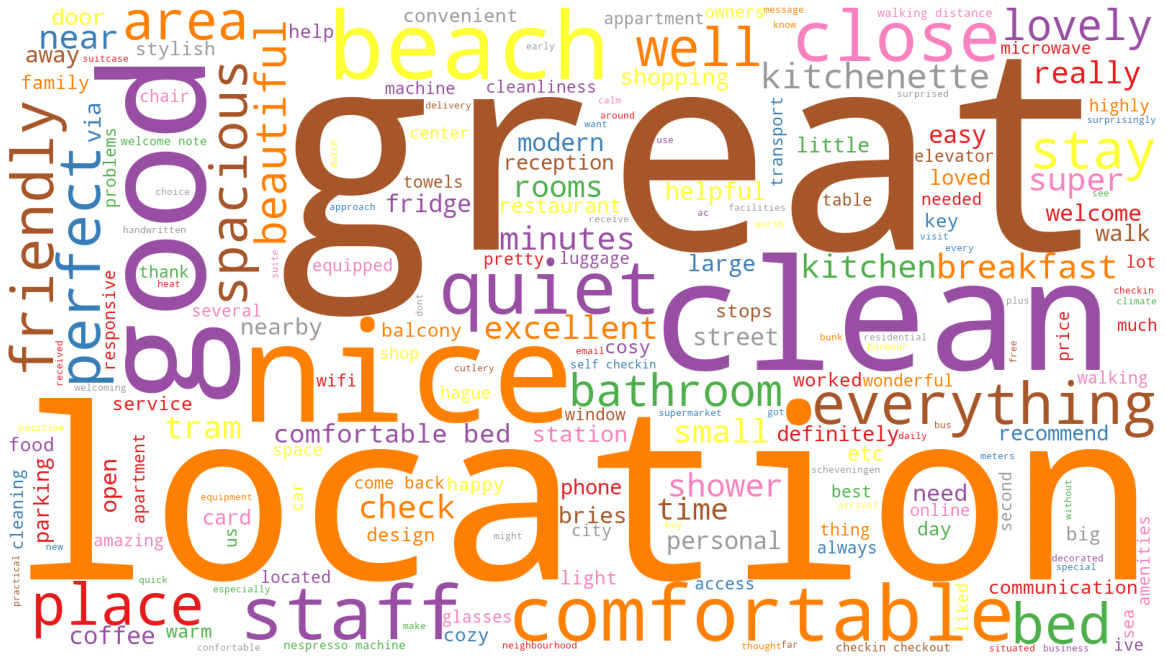

In [100]:
# Plot the wordcloud image:
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.savefig("review_wordcloud.png", format="png")
plt.show()

In [101]:
# Determine the 25 most common words for the review column.
# Generate a DataFrame from Counter.
review_counts = pd.DataFrame(Counter(tokens_review2).most_common(25),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
review_counts

Frequency
Word                  
great               33
location            31
clean               28
comfortable         27
good                25
nice                25
beach               19
staff               18
quiet               18
close               16
everything          15
also                15
friendly            15
bed                 15
perfect             15
well                13
area                13
stay                13
spacious            12
place               12
bathroom            12
beautiful           11
lovely              11
kitchenette         11
near                10

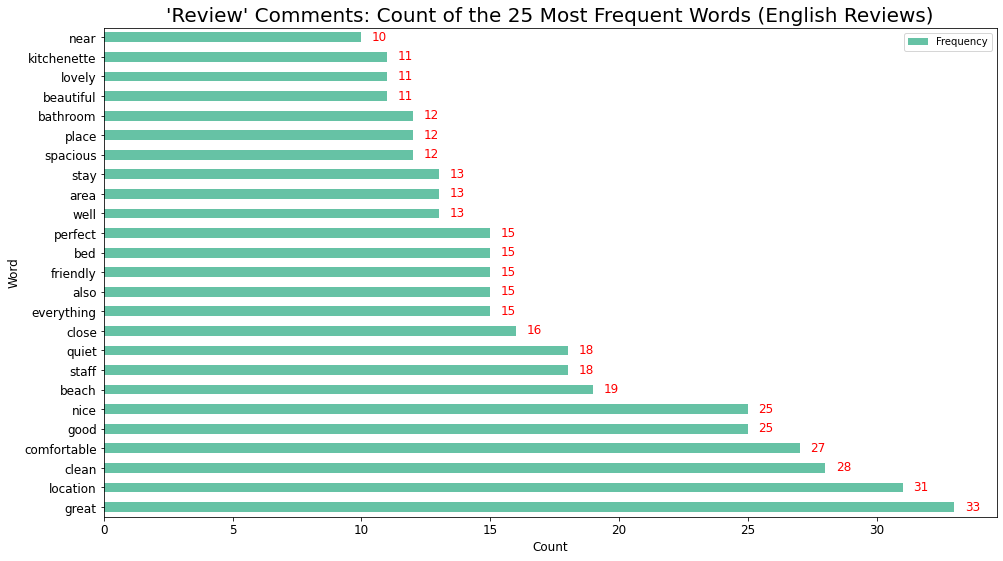

In [188]:
#Create a bar plot visualisation of the top 25 words.
# Set the plot type.
ax = review_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='Set2')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("'Review' Comments: Count of the 25 Most Frequent Words (English Reviews)",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
plt.savefig('top_25_review_words.png')

In [103]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [104]:
# Determine polarity of review column. 
# Populate a new column with polarity scores.
all_reviews['polarity_review'] = all_reviews['review'].apply(generate_polarity)

# Preview the result.
all_reviews['polarity_review'].head()

0    0.400000
1    0.037500
2    0.409896
3    0.800000
4    0.580000
Name: polarity_review, dtype: float64

In [105]:
# Define a function to extract a subjectivity score.
def generate_subjectivity(comment):
    return TextBlob(comment).sentiment[1]

# Populate a new column with subjectivity scores for each column.
all_reviews['subjectivity_review'] = all_reviews['review'].apply(generate_subjectivity)

# Preview the result.
all_reviews['subjectivity_review'].head()

0    0.80000
1    0.63125
2    0.60000
3    0.75000
4    0.72000
Name: subjectivity_review, dtype: float64

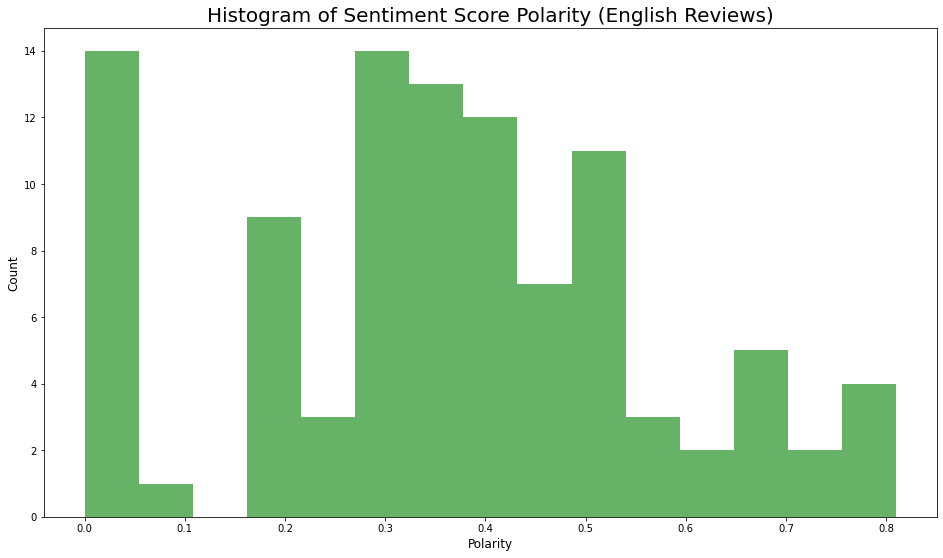

In [189]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(all_reviews['polarity_review'], num_bins, facecolor='green', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Sentiment Score Polarity (English Reviews)', fontsize=20)
plt.savefig('reviews_sentiment.png')

plt.show()

In [107]:
# Top 30 negative reviews.
# Create a DataFrame.
negative_review_sentiment = all_reviews.nsmallest(30, 'polarity_review')

# Eliminate unnecessary columns.
negative_review_sentiment = negative_review_sentiment[['review', 'polarity_review', 'subjectivity_review']]

# Adjust the column width.
negative_review_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

negative_review_sentiment.to_csv("negative_reviews.csv")

In [108]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_review_sentiment = all_reviews.nlargest(30, 'polarity_review')

# Eliminate unnecessary columns.
positive_review_sentiment = positive_review_sentiment[['review', 'polarity_review', 'subjectivity_review']]

# Adjust the column width.
positive_review_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

positive_review_sentiment.to_csv("positive_reviews.csv")

# 100 Most Recent Dutch Reviews

In [110]:
# Import the url for page 1 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl&dist=1&pagename=bries-den-haag12&r_lang=nl&srpvid=8bf37b30f31100e3&type=total&rows=10&_=1700757228005&offset=0'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [111]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [112]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [113]:
# Reviews are put into a DataFrame:
dutch_reviews1 = pd.DataFrame(reviews_data)
dutch_reviews1

review
0                                                None
1                                                None
2                                                None
3   [Prima en uitgebreid ontbijt. Ruime kamer, zee...
4                                                None
..                                                ...
57                                               None
58  [Super klantvriendelijk, hygiënisch, kamer was...
59                                               None
60                                               None
61                                               None

[62 rows x 1 columns]

In [114]:
# The 'None' values are dropped and the index reset:
dutch_reviews1 = dutch_reviews1.replace(to_replace='None', value=np.nan).dropna()

dutch_reviews1.reset_index()

index                                             review
0      3  [Prima en uitgebreid ontbijt. Ruime kamer, zee...
1      9  [Ligging in Staatsliedenbuurt, nabij leuke Fre...
2     15  [Ene heel mooi ingericht en gezellig boutiqueh...
3     22  [Ik arriveerde vrij laat 's avonds met de tram...
4     28  [Ik heb heerlijk geslapen in een goed bed. Het...
5     34  [Eigenlijk waren we over alles heel tevreden. ...
6     40  [Mooi ingericht en erg schoon. Handige manier ...
7     46  [Leuk, knus hotel afgelegen van de drukke voor...
8     52  [- heerlijke bedden\r- makkelijke check-in\r- ...
9     58  [Super klantvriendelijk, hygiënisch, kamer was...

In [115]:
# Import the url for page 2 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=nl;srpvid=8bf37b30f31100e3;type=total&&offset=10;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [116]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [117]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [118]:
# Reviews are put into a DataFrame:
dutch_reviews2 = pd.DataFrame(reviews_data)
dutch_reviews2

review
0                                                None
1                                                None
2                                                None
3   [Prima kamer net uitstekend bed in Scheveninge...
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9   [Zeer ruime en heel nette kamer en badkamer. B...
10                                               None
11                                               None
12                                               None
13                                               None
14                                               None
15  [Leuk ingericht en schoon en supervriendelijke...
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21              [Propere kamer en flexibele receptie]
22                                               None
23                                               None
24                                               None
25                                               None
26                                               None
27  [Perfecte locatie, hele fijne frisse familieka...
28                                               None
29                                               None
30                                               None
31                                               None
32                                               None
33  [Het ontbijt was lekker en genoeg. Frigo en ma...
34                                               None
35                                               None
36                                               None
37                                               None
38                                               None
39  [Prima Hotel, zeer efficiente bedrijfsvoering ...
40                                               None
41                                               None
42                                               None
43                                               None
44                                               None
45                                 [Netjes en schoon]
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51  [Leuke kamer en mooie en fijne badkamer. Kindv...
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57  [Vlotte service (alles online perfect geregeld...
58                                               None
59                                               None

In [119]:
# The 'None' values are dropped and the index reset:
dutch_reviews2 = dutch_reviews2.replace(to_replace='None', value=np.nan).dropna()

dutch_reviews2.reset_index()

index                                             review
0      3  [Prima kamer net uitstekend bed in Scheveninge...
1      9  [Zeer ruime en heel nette kamer en badkamer. B...
2     15  [Leuk ingericht en schoon en supervriendelijke...
3     21              [Propere kamer en flexibele receptie]
4     27  [Perfecte locatie, hele fijne frisse familieka...
5     33  [Het ontbijt was lekker en genoeg. Frigo en ma...
6     39  [Prima Hotel, zeer efficiente bedrijfsvoering ...
7     45                                 [Netjes en schoon]
8     51  [Leuke kamer en mooie en fijne badkamer. Kindv...
9     57  [Vlotte service (alles online perfect geregeld...

In [120]:
# Import the url for page 3 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=nl;srpvid=8bf37b30f31100e3;type=total&&offset=20;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [121]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [122]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [123]:
# Reviews are put into a DataFrame:
dutch_reviews3 = pd.DataFrame(reviews_data)
dutch_reviews3

review
0                                                None
1                                                None
2                                                None
3   [Prachtige locatie, schoon en ruim. Makkelijk ...
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9             [Locatie en de netheid van appartement]
10                                               None
11                                               None
12                                               None
13                                               None
14                                               None
15  [De locatie is goed. Vlak bij een sfeervol win...
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21                                 [Het mooie design]
22                                               None
23                                               None
24                                               None
25                                               None
26                                               None
27  [Modern ingerichte, zeer schone, kamer met goe...
28                                               None
29                                               None
30                                               None
31                                               None
32                                               None
33  [makkelijke toegang, parkeren in de straat en ...
34                                               None
35                                               None
36                                               None
37                                               None
38                                               None
39                        [Schoon, modern en netjes.]
40                                               None
41                                               None
42                                               None
43                                               None
44                                               None
45                 [Ligging en faciliteiten op kamer]
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51                [Prima plek, niet te ver van haven]
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57                            [zeer schoon en netjes]
58                                               None
59                                               None

In [124]:
# The 'None' values are dropped and the index reset:
dutch_reviews3 = dutch_reviews3.replace(to_replace='None', value=np.nan).dropna()

dutch_reviews3.reset_index()

index                                             review
0      3  [Prachtige locatie, schoon en ruim. Makkelijk ...
1      9            [Locatie en de netheid van appartement]
2     15  [De locatie is goed. Vlak bij een sfeervol win...
3     21                                 [Het mooie design]
4     27  [Modern ingerichte, zeer schone, kamer met goe...
5     33  [makkelijke toegang, parkeren in de straat en ...
6     39                        [Schoon, modern en netjes.]
7     45                 [Ligging en faciliteiten op kamer]
8     51                [Prima plek, niet te ver van haven]
9     57                            [zeer schoon en netjes]

In [125]:
# Import the url for page 4 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=nl;srpvid=8bf37b30f31100e3;type=total&&offset=30;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [126]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [127]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [128]:
# Reviews are put into a DataFrame:
dutch_reviews4 = pd.DataFrame(reviews_data)
dutch_reviews4

review
0                                                None
1                                                None
2                                                None
3                                  [Zeer ruime kamer]
4                                                None
5                                                None
6                                                None
7                                                None
8   [Hartelijk ontvangst, prachtige comfortabele k...
9                                                None
10                                               None
11                                               None
12                                               None
13                                               None
14  [De kamers zijn ruim opgezet en heb een fris i...
15                                               None
16                                               None
17                                               None
18                                               None
19  [De badkamer kan praktischer. \rEen tablet voo...
20                                               None
21                                               None
22                                               None
23                                               None
24                   [Heerlijke bedden, fijne douche]
25                                               None
26                                               None
27                                               None
28                                               None
29                                               None
30  [Prima locatie in rustige buurt. Mooi en gezel...
31                                               None
32                                               None
33                                               None
34                                               None
35                                          [ligging]
36                                               None
37                                               None
38                                               None
39                                               None
40                                               None
41                   [De ligging en de ruime kamers.]
42                                               None
43                                               None
44                                               None
45                                               None
46                                               None
47      [mooie ruime verzorgde kamer en een goed bed]
48                                               None
49                                               None
50                                               None
51                                               None
52                                               None
53  [Vlotte communicatie via mail, maar het person...
54                                               None
55                                               None

In [129]:
# The 'None' values are dropped and the index reset:
dutch_reviews4 = dutch_reviews4.replace(to_replace='None', value=np.nan).dropna()

dutch_reviews4.reset_index()

index                                             review
0      3                                 [Zeer ruime kamer]
1      8  [Hartelijk ontvangst, prachtige comfortabele k...
2     14  [De kamers zijn ruim opgezet en heb een fris i...
3     19  [De badkamer kan praktischer. \rEen tablet voo...
4     24                   [Heerlijke bedden, fijne douche]
5     30  [Prima locatie in rustige buurt. Mooi en gezel...
6     35                                          [ligging]
7     41                   [De ligging en de ruime kamers.]
8     47      [mooie ruime verzorgde kamer en een goed bed]
9     53  [Vlotte communicatie via mail, maar het person...

In [130]:
# Import the url for page 5 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=nl;srpvid=8bf37b30f31100e3;type=total&&offset=40;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [131]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [132]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [133]:
# Reviews are put into a DataFrame:
dutch_reviews5 = pd.DataFrame(reviews_data)
dutch_reviews5

review
0                                                None
1                                                None
2                                                None
3   [ongedwongenheid, mooie kamer met veel facilit...
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9   [Het ontbijt was een leuke verrassing. Glutenv...
10                                               None
11                                               None
12                                               None
13                                               None
14  [zeer comfortabele kamer . ruim en met kleine ...
15                                               None
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21  [Comfortabel appartement met prima bed en goed...
22                                               None
23                                               None
24                                               None
25                                               None
26  [prettige kamer, mooi design, heerlijk bed, he...
27                                               None
28                                               None
29                                               None
30                                               None
31                                               None
32           [Pantry met eigen koffie en inrichting.]
33                                               None
34                                               None
35                                               None
36                                               None
37                                               None
38  [Bij aankomst bleek dat ik een upgrade had gek...
39                                               None
40                                               None
41                                               None
42                                               None
43                                               None
44  [Goede familie kamer, stapelbed voor de kids i...
45                                               None
46                                               None
47                                               None
48                                               None
49  [Uitstekende locatie om strand lopend te berei...
50                                               None
51                                               None
52                                               None
53                                               None
54         [schoon en heerlijke bedden en beddengoed]
55                                               None

In [134]:
# The 'None' values are dropped and the index reset:
dutch_reviews5 = dutch_reviews5.replace(to_replace='None', value=np.nan).dropna()

dutch_reviews5.reset_index()

index                                             review
0      3  [ongedwongenheid, mooie kamer met veel facilit...
1      9  [Het ontbijt was een leuke verrassing. Glutenv...
2     14  [zeer comfortabele kamer . ruim en met kleine ...
3     21  [Comfortabel appartement met prima bed en goed...
4     26  [prettige kamer, mooi design, heerlijk bed, he...
5     32           [Pantry met eigen koffie en inrichting.]
6     38  [Bij aankomst bleek dat ik een upgrade had gek...
7     44  [Goede familie kamer, stapelbed voor de kids i...
8     49  [Uitstekende locatie om strand lopend te berei...
9     54         [schoon en heerlijke bedden en beddengoed]

In [135]:
# Import the url for page 6 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=nl;srpvid=8bf37b30f31100e3;type=total&&offset=50;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [136]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [137]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [138]:
# Reviews are put into a DataFrame:
dutch_reviews6 = pd.DataFrame(reviews_data)
dutch_reviews6

review
0                                                None
1                                                None
2                                                None
3   [Super makkelijke check-in, hele mooie kamers ...
4                                                None
5                                                None
6                                                None
7                                                None
8   [Prettige suite, ruime badkamer, complete kitc...
9                                                None
10                                               None
11                                               None
12                                               None
13  [We hebben geen ontbijt bij Anne&Max genomen, ...
14                                               None
15                                               None
16                                               None
17                                               None
18  [Heerlijk appartement. Compact, modern, oog vo...
19                                               None
20                                               None
21                                               None
22                                               None
23                                               None
24  [Heerlijke kamer, rustig fijne douche\rLekker ...
25                                               None
26                                               None
27                                               None
28                                               None
29                                               None
30  [Lekker alles voor mezelf, heerlijk mijn eigen...
31                                               None
32                                               None
33                                               None
34                                               None
35                                               None
36               [mooie ruime kamer, schoon, locatie]
37                                               None
38                                               None
39                                               None
40                                               None
41                                               None
42  [We werden verwelkomt door een héle sympathiek...
43                                               None
44                                               None
45                                               None
46                                               None
47                                               None
48  [mooi hotel, nieuw, schoon en het online inche...
49                                               None
50                                               None
51                                               None
52                                               None
53                                               None
54  [Ik had mijn eigen ontbijt meegenomen en was h...
55                                               None

In [139]:
# The 'None' values are dropped and the index reset:
dutch_reviews6 = dutch_reviews6.replace(to_replace='None', value=np.nan).dropna()

dutch_reviews6.reset_index()

index                                             review
0      3  [Super makkelijke check-in, hele mooie kamers ...
1      8  [Prettige suite, ruime badkamer, complete kitc...
2     13  [We hebben geen ontbijt bij Anne&Max genomen, ...
3     18  [Heerlijk appartement. Compact, modern, oog vo...
4     24  [Heerlijke kamer, rustig fijne douche\rLekker ...
5     30  [Lekker alles voor mezelf, heerlijk mijn eigen...
6     36               [mooie ruime kamer, schoon, locatie]
7     42  [We werden verwelkomt door een héle sympathiek...
8     48  [mooi hotel, nieuw, schoon en het online inche...
9     54  [Ik had mijn eigen ontbijt meegenomen en was h...

In [140]:
# Import the url for page 7 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=nl;srpvid=8bf37b30f31100e3;type=total&&offset=60;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [141]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [142]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [143]:
# Reviews are put into a DataFrame:
dutch_reviews7 = pd.DataFrame(reviews_data)
dutch_reviews7

review
0                                                None
1                                                None
2                                                None
3            [De kamer was zeer ruime en confortable]
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9   [Mijn overnachting in het hotel Bries was een ...
10                                               None
11                                               None
12                                               None
13                                               None
14                                               None
15                                   [schoon, modern]
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21  [de omgeving rond het hotel, de ruime kamer, d...
22                                               None
23                                               None
24                                               None
25                                               None
26                  [Dicht bij het centrum en strand]
27                                               None
28                                               None
29                                               None
30                                               None
31                                               None
32  [Mooie kamers, vriendelijk personeel, fijne co...
33                                               None
34                                               None
35                                               None
36                                               None
37                                               None
38                [Schoon. Goed bed. Rustige straat.]
39                                               None
40                                               None
41                                               None
42                                               None
43                                               None
44               [bed was schoon en een goed matras.]
45                                               None
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51            [Het heerlijke bed, en een mooie tuin.]
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57                            [schoon en comfortabel]
58                                               None
59                                               None

In [144]:
# The 'None' values are dropped and the index reset:
dutch_reviews7 = dutch_reviews7.replace(to_replace='None', value=np.nan).dropna()

dutch_reviews7.reset_index()

index                                             review
0      3           [De kamer was zeer ruime en confortable]
1      9  [Mijn overnachting in het hotel Bries was een ...
2     15                                   [schoon, modern]
3     21  [de omgeving rond het hotel, de ruime kamer, d...
4     26                  [Dicht bij het centrum en strand]
5     32  [Mooie kamers, vriendelijk personeel, fijne co...
6     38                [Schoon. Goed bed. Rustige straat.]
7     44               [bed was schoon en een goed matras.]
8     51            [Het heerlijke bed, en een mooie tuin.]
9     57                            [schoon en comfortabel]

In [145]:
# Import the url for page 8 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=nl;srpvid=8bf37b30f31100e3;type=total&&offset=70;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [146]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [147]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [148]:
# Reviews are put into a DataFrame:
dutch_reviews8 = pd.DataFrame(reviews_data)
dutch_reviews8

review
0                                                None
1                                                None
2                                                None
3                [Comfort kamer, personeel, locatie.]
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9                     [schoon en praktisch ingericht]
10                                               None
11                                               None
12                                               None
13                                               None
14                                               None
15  [Mooie kamer, lekker uitgebreid ontbijt en vri...
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21                              [ales prima verzorgd]
22                                               None
23                                               None
24                                               None
25                                               None
26                                               None
27  [Ik ben heel aangenaam verrast met mijn verbli...
28                                               None
29                                               None
30                                               None
31                                               None
32                                               None
33     [De kamer met keuken en de ruime doucheruimte]
34                                               None
35                                               None
36                                               None
37                                               None
38                                               None
39  [We waren een half uur eerder voor de digitale...
40                                               None
41                                               None
42                                               None
43                                               None
44                                               None
45  [Het ontvangst, de moderne faciliteiten en de ...
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51  [We werden hartelijk ontvangen, al was ik zelf...
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57  [Bij aankomst stond er iemand ons op te wachte...
58                                               None
59                                               None

In [149]:
# The 'None' values are dropped and the index reset:
dutch_reviews8 = dutch_reviews8.replace(to_replace='None', value=np.nan).dropna()

dutch_reviews8.reset_index()

index                                             review
0      3               [Comfort kamer, personeel, locatie.]
1      9                    [schoon en praktisch ingericht]
2     15  [Mooie kamer, lekker uitgebreid ontbijt en vri...
3     21                              [ales prima verzorgd]
4     27  [Ik ben heel aangenaam verrast met mijn verbli...
5     33     [De kamer met keuken en de ruime doucheruimte]
6     39  [We waren een half uur eerder voor de digitale...
7     45  [Het ontvangst, de moderne faciliteiten en de ...
8     51  [We werden hartelijk ontvangen, al was ik zelf...
9     57  [Bij aankomst stond er iemand ons op te wachte...

In [150]:
# Import the url for page 9 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=nl;srpvid=8bf37b30f31100e3;type=total&&offset=80;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [151]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [152]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [153]:
# Reviews are put into a DataFrame:
dutch_reviews9 = pd.DataFrame(reviews_data)
dutch_reviews9

review
0                                                None
1                                                None
2                                                None
3                        [mooi en sfeervol interieur]
4                                                None
..                                                ...
57                                               None
58                                               None
59  [Super schoon en ik was erg vroeg en werd daar...
60                                               None
61                                               None

[62 rows x 1 columns]

In [154]:
# The 'None' values are dropped and the index reset:
dutch_reviews9 = dutch_reviews9.replace(to_replace='None', value=np.nan).dropna()

dutch_reviews9.reset_index()

index                                             review
0      3                       [mooi en sfeervol interieur]
1      9  [Heerlijke rust in een zeer mooie kamer. Warm ...
2     15  [Prima ligging. Schone kamer, fijn en prettig ...
3     22  [Ontzettend leuk, smaakvol, hip hotel op een p...
4     28  [Het inchecken zonder receptie is super. FF we...
5     34  [Er is een kitchenette aanwezig, plus magnetro...
6     41  [zeer nette familiekamer waarbij er voldoende ...
7     47  [Goede locatie, top kamer, prima ontbijt. Ech ...
8     53  [Top overnachting, in een mooi en schoon hotel...
9     59  [Super schoon en ik was erg vroeg en werd daar...

In [155]:
# Import the url for page 10 of the reviews:
# Create a variable to store the URL.
url = 'https://www.booking.com/reviewlist.en-gb.html?aid=304142&label=gen173nr-1FCAEoggI46AdIM1gEaFCIAQGYAQm4AQfIAQ3YAQHoAQH4AQyIAgGoAgO4As7p46oGwAIB0gIkNTQzNThjNTctODdiMi00MjlkLTkzYzYtYjcyZTNkNTYyZTc52AIG4AIB&sid=d805fd0f3ceae3982a464acf45bcb393&cc1=nl;dist=1;pagename=bries-den-haag12;r_lang=nl;srpvid=8bf37b30f31100e3;type=total&&offset=90;rows=10'
headers = {
    'User-Agent': 'Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.64 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}
# Create a variable to store the information.
page = requests.get(url, headers=headers)

# Make contact with the website.
page

<Response [200]>

In [156]:
# Look at the html code.
# Create a variable to store the HTML info.
soup = BeautifulSoup(page.text, 'html.parser')

# Print the output in a readable format.
print(soup.prettify())

<input name="highlight_text" type="hidden" value=""/>
<div class="bui-group bui-group--inline bui-inline-container--topics-wrapper topic-filters--separated g-hidden js-review-topics" data-placement-target=".bui-panel-group--reviewlist .bui-panel--topics-wrapper .bui-form__group" id="reviews_filter_topics_raw">
 <div class="bui-group bui-inline-container--topics-wrapper topics-wrapper__update">
  <label>
   Select a topic to search reviews:
  </label>
  <div class="bui-group bui-group--inline">
   <label class="bui-input-checkbutton">
    <input class="bui-input-checkbutton__input" data-category-id="270" data-category-name="room" data-js-review-topic="1" data-topic-from-content="" type="checkbox">
     <span class="bui-input-checkbutton__item">
      Room
      <svg aria-hidden="true" class="bk-icon -iconset-plus bui-input-checkbutton__check" focusable="false" height="16" role="presentation" viewbox="0 0 128 128" width="16">
       <path d="M108 60H68V20a4 4 0 0 0-8 0v40H20a4 4 0 0 0 0 

In [157]:
# Find all the review elements in the HTML document
bries_reviews = soup.findAll('div', {'class': 'c-review-block__row'})

# Extract reviews:
reviews_data = []
 # Loop over the review elements and extract the desired data
for review in bries_reviews:
    # Extract the review
    review_element = review.find('span', {'class': 'c-review__body'})
    reviewer = review_element#.text.strip()
    
    # Append reviews_data with info about review
    reviews_data.append({
        'review': reviewer
    })

In [158]:
# Reviews are put into a DataFrame:
dutch_reviews10 = pd.DataFrame(reviews_data)
dutch_reviews10

review
0                                                None
1                                                None
2                                                None
3   [Wij hebben met ons 4tjes heerlijk genoten van...
4                                                None
5                                                None
6                                                None
7                                                None
8                                                None
9   [alles leek nieuw! ruime inloopdouche (heb ik ...
10                                               None
11                                               None
12                                               None
13                                               None
14                                               None
15                                  [de mooie kamers]
16                                               None
17                                               None
18                                               None
19                                               None
20                                               None
21                                    [mooie locatie]
22                                               None
23                                               None
24                                               None
25                                               None
26                                               None
27  [Zeer vriendelijk ontvangen. Kamers heerlijk s...
28                                               None
29                                               None
30                                               None
31                                               None
32                                               None
33  [De bedden waren er fijn, ook voor de kinderen...
34                                               None
35                                               None
36                                               None
37                                               None
38                                               None
39  [ligging tussen Den Haag en Scheveningen op lo...
40                                               None
41                                               None
42                                               None
43                                               None
44                                               None
45  [Locatie is heel fijn, rustig gelegen in mooie...
46                                               None
47                                               None
48                                               None
49                                               None
50                                               None
51  [Familiekamer werkt prima met afgescheiden kle...
52                                               None
53                                               None
54                                               None
55                                               None
56                                               None
57  [makkelijk in de kamer te komen zonder ergens ...
58                                               None

In [159]:
# The 'None' values are dropped and the index reset:
dutch_reviews10 = dutch_reviews10.replace(to_replace='None', value=np.nan).dropna()

dutch_reviews10.reset_index()

index                                             review
0      3  [Wij hebben met ons 4tjes heerlijk genoten van...
1      9  [alles leek nieuw! ruime inloopdouche (heb ik ...
2     15                                  [de mooie kamers]
3     21                                    [mooie locatie]
4     27  [Zeer vriendelijk ontvangen. Kamers heerlijk s...
5     33  [De bedden waren er fijn, ook voor de kinderen...
6     39  [ligging tussen Den Haag en Scheveningen op lo...
7     45  [Locatie is heel fijn, rustig gelegen in mooie...
8     51  [Familiekamer werkt prima met afgescheiden kle...
9     57  [makkelijk in de kamer te komen zonder ergens ...

In [160]:
# Join all the DataFrames into one DataFrame for analysis:

all_dutch_reviews = pd.concat([dutch_reviews1, dutch_reviews2, dutch_reviews3, dutch_reviews4, dutch_reviews5
                        , dutch_reviews6, dutch_reviews7, dutch_reviews8, dutch_reviews9, dutch_reviews10], axis=0)

all_dutch_reviews

review
3   [Prima en uitgebreid ontbijt. Ruime kamer, zee...
9   [Ligging in Staatsliedenbuurt, nabij leuke Fre...
15  [Ene heel mooi ingericht en gezellig boutiqueh...
22  [Ik arriveerde vrij laat 's avonds met de tram...
28  [Ik heb heerlijk geslapen in een goed bed. Het...
..                                                ...
33  [De bedden waren er fijn, ook voor de kinderen...
39  [ligging tussen Den Haag en Scheveningen op lo...
45  [Locatie is heel fijn, rustig gelegen in mooie...
51  [Familiekamer werkt prima met afgescheiden kle...
57  [makkelijk in de kamer te komen zonder ergens ...

[100 rows x 1 columns]

# Sentiment Analysis of the Dutch Reviews

In [161]:
# Determine if there are any missing values.
all_dutch_reviews['review'].isna().sum()

0

In [162]:
# The reviews are changed from lists to strings:

all_dutch_reviews = pd.DataFrame(all_dutch_reviews['review'].apply(lambda x: ''.join(map(str, x))))

all_dutch_reviews

review
3   Prima en uitgebreid ontbijt. Ruime kamer, zeer...
9   Ligging in Staatsliedenbuurt, nabij leuke Fred...
15  Ene heel mooi ingericht en gezellig boutiqueho...
22  Ik arriveerde vrij laat 's avonds met de tram ...
28  Ik heb heerlijk geslapen in een goed bed. Het ...
..                                                ...
33  De bedden waren er fijn, ook voor de kinderen....
39  ligging tussen Den Haag en Scheveningen op loo...
45  Locatie is heel fijn, rustig gelegen in mooie ...
51  Familiekamer werkt prima met afgescheiden klei...
57  makkelijk in de kamer te komen zonder ergens t...

[100 rows x 1 columns]

In [163]:
# Change all to lower case and join with a space.

all_dutch_reviews['review'] = all_dutch_reviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

all_dutch_reviews['review'].head()

3     prima en uitgebreid ontbijt. ruime kamer, zeer...
9     ligging in staatsliedenbuurt, nabij leuke fred...
15    ene heel mooi ingericht en gezellig boutiqueho...
22    ik arriveerde vrij laat 's avonds met de tram ...
28    ik heb heerlijk geslapen in een goed bed. het ...
Name: review, dtype: object

In [164]:
# Replace all the punctuation in review column.
all_dutch_reviews['review'] = all_dutch_reviews['review'].str.replace('[^\w\s]','')

# View output.
all_dutch_reviews['review'].head()

3     prima en uitgebreid ontbijt ruime kamer zeer s...
9     ligging in staatsliedenbuurt nabij leuke frede...
15    ene heel mooi ingericht en gezellig boutiqueho...
22    ik arriveerde vrij laat s avonds met de tram v...
28    ik heb heerlijk geslapen in een goed bed het i...
Name: review, dtype: object

In [165]:
# Check for duplicates in the review column.
all_dutch_reviews.review.duplicated().sum()

0

In [166]:
# Apply tokenisation to the reviews.
all_dutch_reviews['tokens'] = all_dutch_reviews['review'].apply(word_tokenize)

# View DataFrame.
all_dutch_reviews.reset_index()
all_dutch_reviews.head()

review  \
3   prima en uitgebreid ontbijt ruime kamer zeer s...   
9   ligging in staatsliedenbuurt nabij leuke frede...   
15  ene heel mooi ingericht en gezellig boutiqueho...   
22  ik arriveerde vrij laat s avonds met de tram v...   
28  ik heb heerlijk geslapen in een goed bed het i...   

                                               tokens  
3   [prima, en, uitgebreid, ontbijt, ruime, kamer,...  
9   [ligging, in, staatsliedenbuurt, nabij, leuke,...  
15  [ene, heel, mooi, ingericht, en, gezellig, bou...  
22  [ik, arriveerde, vrij, laat, s, avonds, met, d...  
28  [ik, heb, heerlijk, geslapen, in, een, goed, b...

In [167]:
# Convert the tokens column from lists to a string in a new DataFrame in order to create Word Cloud.
dutch_review_words = pd.DataFrame(all_dutch_reviews['tokens'].apply(lambda x: ','.join(map(str, x))))

dutch_review_words

tokens
3   prima,en,uitgebreid,ontbijt,ruime,kamer,zeer,s...
9   ligging,in,staatsliedenbuurt,nabij,leuke,frede...
15  ene,heel,mooi,ingericht,en,gezellig,boutiqueho...
22  ik,arriveerde,vrij,laat,s,avonds,met,de,tram,v...
28  ik,heb,heerlijk,geslapen,in,een,goed,bed,het,i...
..                                                ...
33  de,bedden,waren,er,fijn,ook,voor,de,kinderen,m...
39  ligging,tussen,den,haag,en,scheveningen,op,loo...
45  locatie,is,heel,fijn,rustig,gelegen,in,mooie,b...
51  familiekamer,werkt,prima,met,afgescheiden,klei...
57  makkelijk,in,de,kamer,te,komen,zonder,ergens,t...

[100 rows x 1 columns]

In [168]:
dutch_review_words = dutch_review_words.reset_index()

In [169]:
# Create a word cloud.
all_tokens = ''

for i in range(dutch_review_words.shape[0]):
    # Add each token to the list.
    all_tokens = all_tokens + dutch_review_words['tokens'][i]

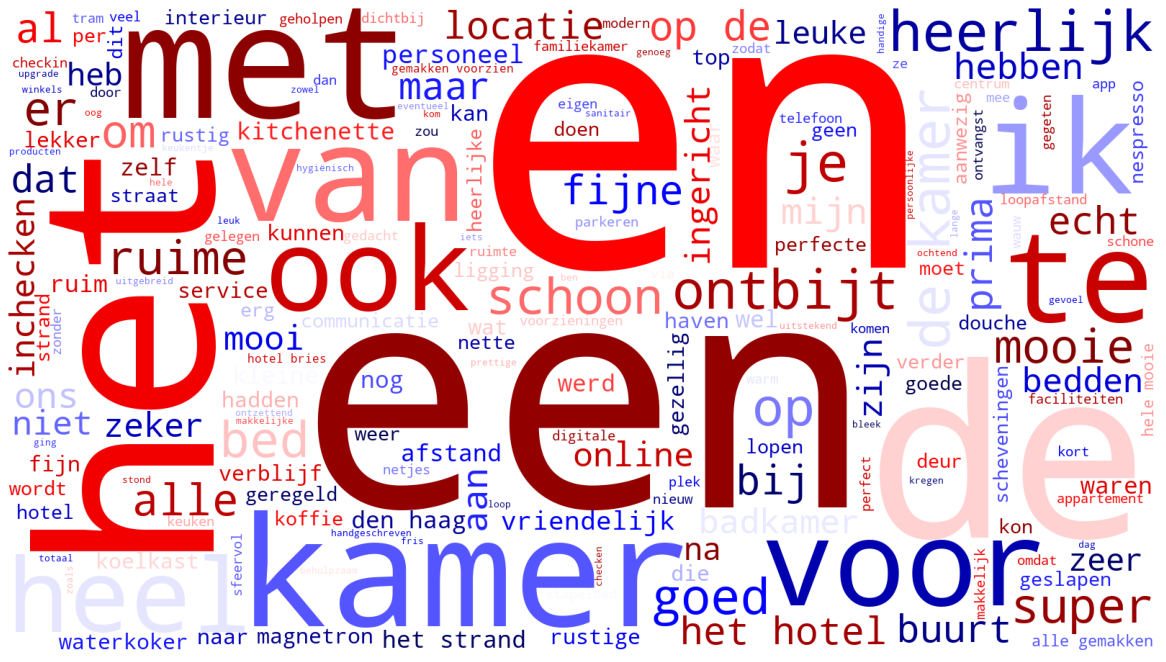

In [170]:
# Plot the WordCloud image.
import matplotlib.pyplot as plt 
import seaborn as sns

# Create a WordCloud.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='seismic', 
                min_font_size = 10).generate(all_tokens) 

# Plot the WordCloud image.                        
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

In [171]:
all_dutch_reviews.reset_index(inplace=True)
all_dutch_reviews

index                                             review  \
0       3  prima en uitgebreid ontbijt ruime kamer zeer s...   
1       9  ligging in staatsliedenbuurt nabij leuke frede...   
2      15  ene heel mooi ingericht en gezellig boutiqueho...   
3      22  ik arriveerde vrij laat s avonds met de tram v...   
4      28  ik heb heerlijk geslapen in een goed bed het i...   
..    ...                                                ...   
95     33  de bedden waren er fijn ook voor de kinderen m...   
96     39  ligging tussen den haag en scheveningen op loo...   
97     45  locatie is heel fijn rustig gelegen in mooie b...   
98     51  familiekamer werkt prima met afgescheiden klei...   
99     57  makkelijk in de kamer te komen zonder ergens t...   

                                               tokens  
0   [prima, en, uitgebreid, ontbijt, ruime, kamer,...  
1   [ligging, in, staatsliedenbuurt, nabij, leuke,...  
2   [ene, heel, mooi, ingericht, en, gezellig, bou...  
3   [ik, arriveerde, vrij, laat, s, avonds, met, d...  
4   [ik, heb, heerlijk, geslapen, in, een, goed, b...  
..                                                ...  
95  [de, bedden, waren, er, fijn, ook, voor, de, k...  
96  [ligging, tussen, den, haag, en, scheveningen,...  
97  [locatie, is, heel, fijn, rustig, gelegen, in,...  
98  [familiekamer, werkt, prima, met, afgescheiden...  
99  [makkelijk, in, de, kamer, te, komen, zonder, ...  

[100 rows x 3 columns]

In [172]:
# Determine the frequency distribution.
all_words = []

for i in range(all_dutch_reviews.shape[0]):
    # Add each token to the list.
    all_words = all_words + all_dutch_reviews['tokens'][i]

fdist = FreqDist(all_words)

# Preview data.
fdist

FreqDist({'en': 145, 'een': 90, 'de': 87, 'het': 69, 'kamer': 59, 'met': 44, 'in': 39, 'was': 36, 'ik': 33, 'van': 31, ...})

In [173]:
# Delete all the alpanumeric characters:
dutch_tokens_review = [word for word in all_words if word.isalnum()]

In [174]:
# Remove all the stopwords
# Download the stopword list.
nltk.download ('stopwords')
from nltk.corpus import stopwords

# Create a set of Dutch stopwords.
my_dutch_words = ['hotel', 'kamer']
dutch_stopwords = set(stopwords.words('dutch') + my_dutch_words)

# Create filtered lists of tokens without stopwords.
dutch_tokens_review2 = [x for x in dutch_tokens_review if x.lower() not in dutch_stopwords]

# Define empty string variables for review and column.
dutch_tokens_review2_string = ''

for value in dutch_tokens_review2:
    # Add each filtered token word to the string.
    dutch_tokens_review2_string = dutch_tokens_review2_string + value + ' '


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Claire/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [175]:
# Create a 'review' wordcloud without stop words.
wordcloud = WordCloud(width = 1600, height = 900, 
                background_color ='white', 
                colormap='seismic', 
                min_font_size = 10).generate(dutch_tokens_review2_string) 

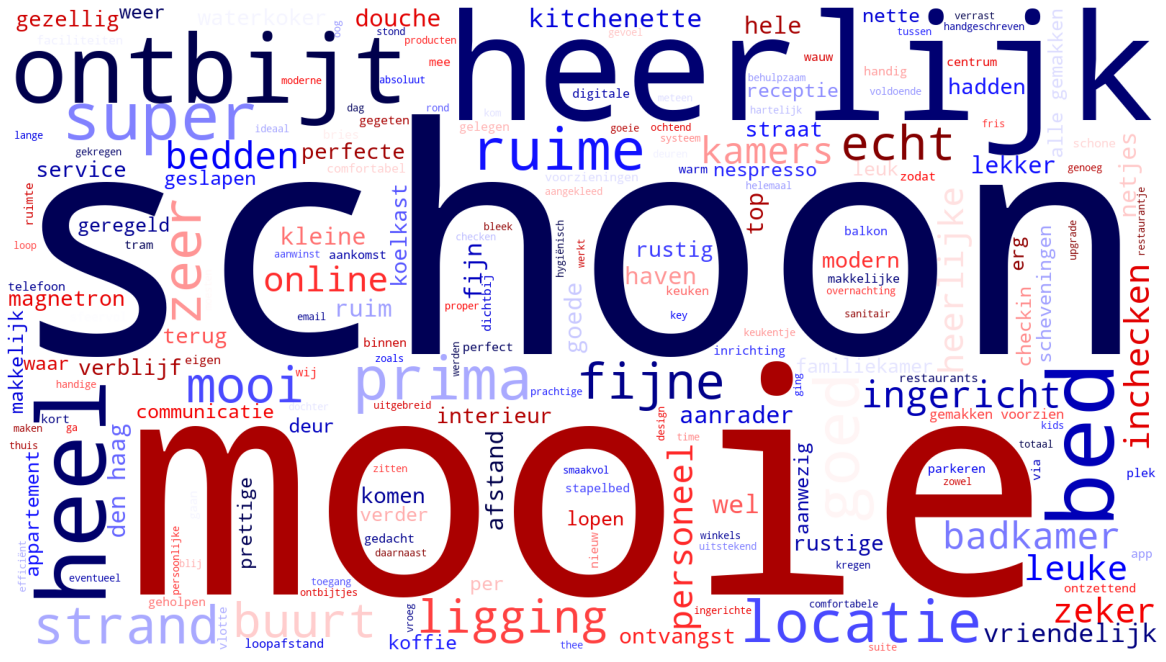

In [176]:
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.savefig("dutch_review_wordcloud.png", format="png")
plt.show()

In [177]:
# Import library needed to do sentiment analysis on Ducth language text:
from textblob_nl import PatternAnalyzer

In [178]:
# Determine the 25 most common words for the review column.
# Generate a DataFrame from Counter.
dutch_review_counts = pd.DataFrame(Counter(dutch_tokens_review2).most_common(25),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
dutch_review_counts

Frequency
Word                
schoon            25
mooie             24
heerlijk          23
ontbijt           22
heel              22
bed               20
super             19
goed              17
prima             16
we                16
ruime             15
locatie           15
zeer              13
strand            12
mooi              11
fijne             11
buurt             10
echt              10
ligging            9
ingericht          9
bedden             9
kamers             9
badkamer           9
online             8
leuke              8

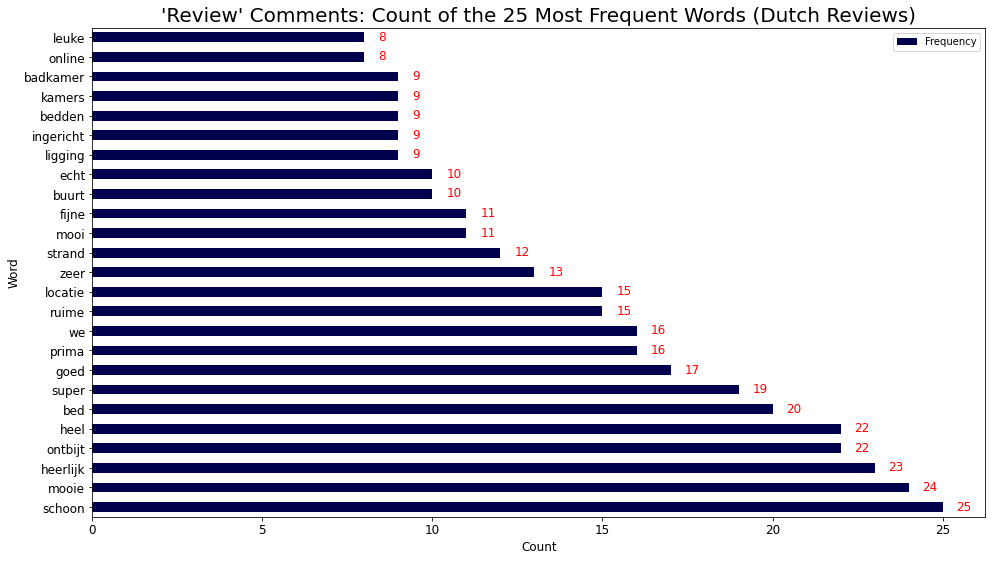

In [192]:
#Create a bar plot visualisation of the top 25 words.
# Set the plot type.
ax = dutch_review_counts.plot(kind='barh', figsize=(16, 9), fontsize=12,
                 colormap ='seismic')

# Set the labels.
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Word', fontsize=12)
ax.set_title("'Review' Comments: Count of the 25 Most Frequent Words (Dutch Reviews)",
             fontsize=20)

# Draw the bar labels.
for i in ax.patches:
    ax.text(i.get_width()+.41, i.get_y()+.1, str(round((i.get_width()), 2)),
            fontsize=12, color='red')
    
plt.savefig('top_25_dutch_review_words.png')

In [180]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment, analyzer=PatternAnalyzer()).sentiment[0]

In [181]:
# Determine polarity of review column. 
# Populate a new column with polarity scores.
all_dutch_reviews['polarity_review'] = all_dutch_reviews['review'].apply(generate_polarity)

# Preview the result.
all_dutch_reviews['polarity_review'].head()

0    0.467778
1    0.250000
2    0.409048
3    0.489167
4    0.483333
Name: polarity_review, dtype: float64

In [182]:
# Define a function to extract a subjectivity score.
def generate_subjectivity(comment):
    return TextBlob(comment, analyzer=PatternAnalyzer()).sentiment[1]

# Populate a new column with subjectivity scores for each column.
all_dutch_reviews['subjectivity_review'] = all_dutch_reviews['review'].apply(generate_subjectivity)

# Preview the result.
all_dutch_reviews['subjectivity_review'].head()

0    0.774444
1    0.505556
2    0.589048
3    0.840333
4    0.711111
Name: subjectivity_review, dtype: float64

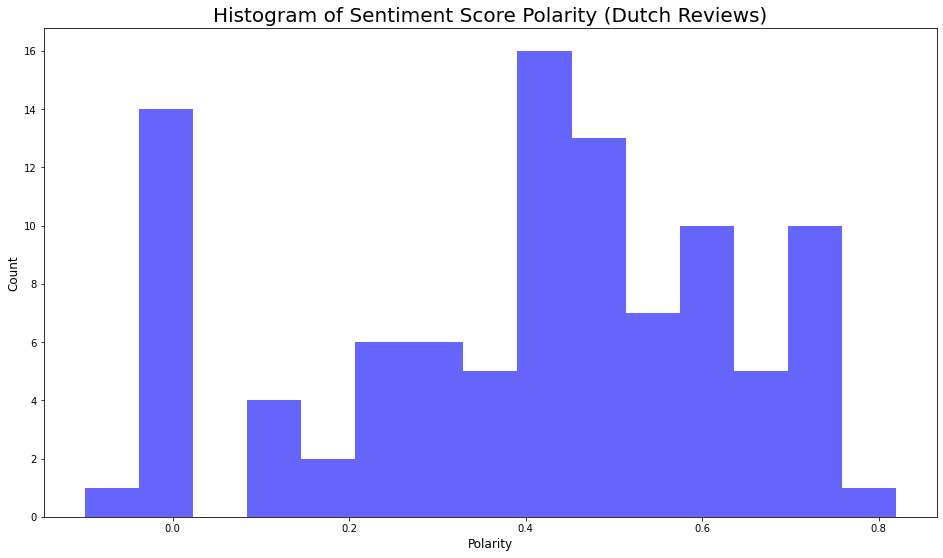

In [185]:
# Create a histogram plot with bins = 15.
# Histogram of polarity
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(all_dutch_reviews['polarity_review'], num_bins, facecolor='blue', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Sentiment Score Polarity (Dutch Reviews)', fontsize=20)
plt.savefig('dutch_reviews_sentiment.png')

plt.show()

In [190]:
# Top 30 negative reviews.
# Create a DataFrame.
negative_review_sentiment = all_dutch_reviews.nsmallest(30, 'polarity_review')

# Eliminate unnecessary columns.
negative_review_sentiment = negative_review_sentiment[['review', 'polarity_review', 'subjectivity_review']]

# Adjust the column width.
negative_review_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

negative_review_sentiment.to_csv("negative_dutch_reviews.csv")

In [191]:
# Top 20 positive reviews.
# Create a DataFrame.
positive_review_sentiment = all_dutch_reviews.nlargest(30, 'polarity_review')

# Eliminate unnecessary columns.
positive_review_sentiment = positive_review_sentiment[['review', 'polarity_review', 'subjectivity_review']]

# Adjust the column width.
positive_review_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

positive_review_sentiment.to_csv("positive_dutch_reviews.csv")